<a href="https://colab.research.google.com/github/yunji6533/Data-Analysys-Programming/blob/main/202211344_%ED%99%8D%EC%9C%A4%EC%A7%80_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자동차에 새로운 기술들은 많이 생겨나면서 과거보다 현재의 사망률 비교를 보고 싶었고 또한 현재 발생하고 있는 교통사고에 관해서 가해자 연령별 구부한 그래프와 사고유형들에 대해 궁금하여 이 주제를 선택하게 되었다.


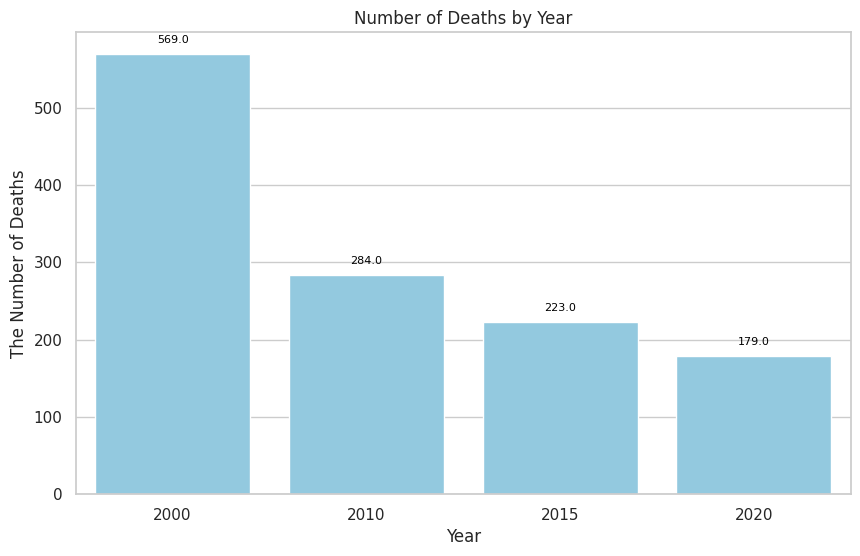

In [17]:
#도로교통공단 교통사고 통계활용

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/sample_data/data1.xlsx")

# 'Year' 열이 있는 경우에만 인덱스로 설정
if 'Year' in df.columns:
    df = df.set_index('Year')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.index, y=df['Death'], color='skyblue')

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.xlabel('Year')
plt.ylabel('The Number of Deaths')
plt.title('Number of Deaths by Year')
plt.show()




위에 결과와 같이 2000년도부터 결과가 계속 줄고있는 것을 확인할 수 있음.

<ipython-input-37-fdce3ae1837a>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = grouped_df.groupby(["Integration of the perpetrator's age group", 'Date of occurrence']).sum().reset_index()


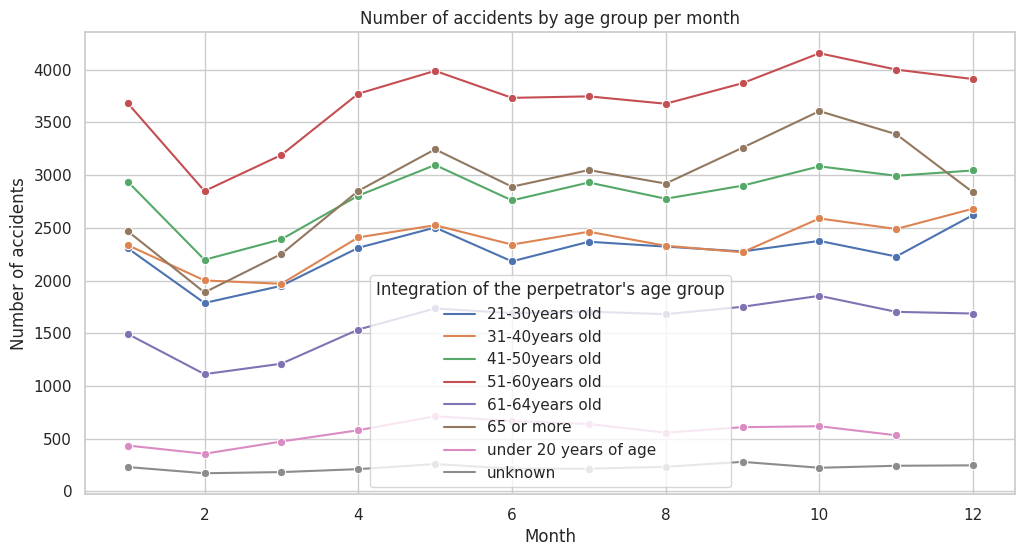

In [37]:
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt

with open("/content/sample_data/data2.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df1 = pd.read_csv("/content/sample_data/data2.csv", encoding=encoding)

# 가해자 연령층을 그룹화하고 발생월에 대한 합계 계산
grouped_df = df1.groupby(["the perpetrator's age group", 'Date of occurrence']).sum().reset_index()

# 가해자 연령층을 합쳐서 새로운 그룹 추가
grouped_df["Integration of the perpetrator's age group"] = grouped_df["the perpetrator's age group"].replace({
    'under 20 years of age': 'under 20 years of age',
    '21-30years old': '21-30years old',
    '31-40years old': '31-40years old',
    '41-50years old': '41-50years old',
    '51-60years old': '51-60years old',
    '61-64years old': '61-64years old',
    '65 or more': '65 or more'
})

# 새로운 그룹으로 다시 그룹화하고 합계 계산
final_df = grouped_df.groupby(["Integration of the perpetrator's age group", 'Date of occurrence']).sum().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date of occurrence', y='Number of accidents', hue="Integration of the perpetrator's age group", data=final_df, marker='o')
plt.title('Number of accidents by age group per month')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.show()


가해자 연령층별 그래프

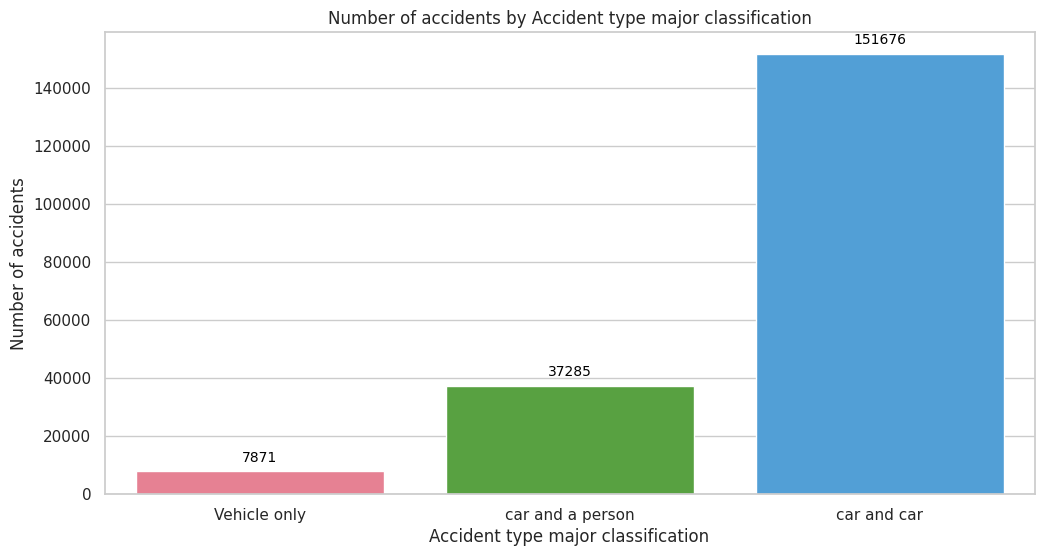

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open("/content/sample_data/data3.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df3 = pd.read_csv("/content/sample_data/data3.csv", encoding=encoding)

# 'Number of accidents' 열을 숫자로 변환
df3['Number of accidents'] = pd.to_numeric(df3['Number of accidents'], errors='coerce')

# "Accident type major classification"을 그룹화하고 "Number of accidents"의 합계 계산
grouped_df3 = df3.groupby('Accident type major classification')['Number of accidents'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", 3)

# 그래프 시각화
ax = sns.barplot(x='Accident type major classification', y='Number of accidents', data=grouped_df3, palette=palette)

# 각 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Number of accidents by Accident type major classification')
plt.xlabel('Accident type major classification')
plt.ylabel('Number of accidents')
plt.show()


사고유형별 교통사고 통계